In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn algorithms and functions
from sklearn.neighbors import KNeighborsClassifier # Scikit-learn KNeighbors Classifier
from sklearn.tree import DecisionTreeClassifier # Scikit-learn Decision Tree Classifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from sklearn.model_selection import KFold # Scikit-learn K-Folds cross-validator
from sklearn.model_selection import cross_val_score # evaluating cross-validator performance
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # KFold configuration

In [ ]:
titanic_df = pd.read_csv('/content/titanic.csv')
titanic_df.head()

In [ ]:
titanic_df.info()

In [ ]:
titanic_df.isnull().sum()

In [62]:
def showChart(feature):
    survived = titanic_df[titanic_df['Survived']==1][feature].value_counts()
    dead = titanic_df[titanic_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(12,8))

In [ ]:
showChart('Sex')

In [ ]:
showChart('Pclass')

In [71]:
titanic_df["Age"].fillna(titanic_df.groupby('Sex')['Age'].transform("median"), inplace=True)

In [ ]:
titanic_df.info()

In [73]:
titanic_df.loc[titanic_df['Age'] <= 18, 'Age'] = 1
titanic_df.loc[(titanic_df['Age'] > 18) & (titanic_df['Age'] <= 40), 'Age'] = 2
titanic_df.loc[(titanic_df['Age'] > 40) & (titanic_df['Age'] <= 60), 'Age'] = 3
titanic_df.loc[titanic_df['Age'] > 60, 'Age'] = 4

In [ ]:
titanic_df.head(20)

In [ ]:
showChart('Age')

In [77]:
lbl = LabelEncoder()
labels = lbl.fit_transform(titanic_df['Sex'])
titanic_df['Sex'] = labels

In [ ]:
titanic_df.head(20)

In [79]:
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [80]:
titanic_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [81]:
title_mapping_values = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Sir": 3, "Mme": 3, "Ms": 3, "Countess": 3, "Capt": 3, "Don": 3, "Dona": 3, "Jonkheer": 3, "Lady": 3}

titanic_df.replace({'Title':title_mapping_values}, inplace=True)

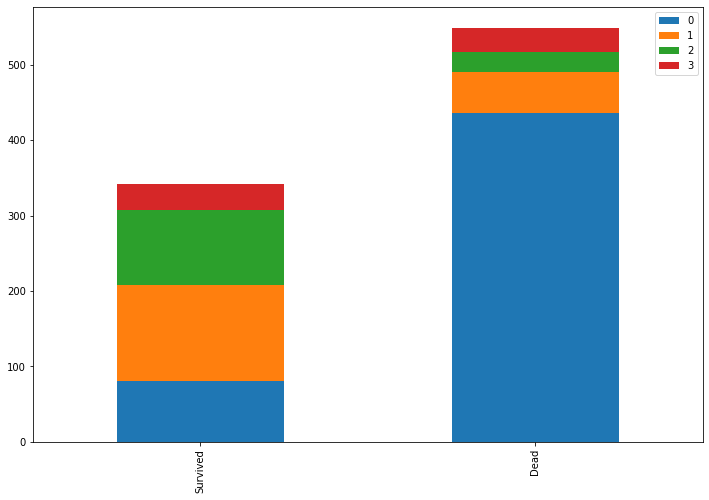

In [82]:
showChart('Title')


In [83]:
features2drop = ['PassengerId','Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']
titanic_df = titanic_df.drop(features2drop, axis=1)

In [84]:
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Title
0,0,3,1,2.0,1,0,0
1,1,1,0,2.0,1,0,2
2,1,3,0,2.0,0,0,1
3,1,1,0,2.0,1,0,2
4,0,3,1,2.0,0,0,0
5,0,3,1,2.0,0,0,0
6,0,1,1,3.0,0,0,0
7,0,3,1,1.0,3,1,3
8,1,3,0,2.0,0,2,2
9,1,2,0,1.0,1,0,2


In [85]:
x = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [87]:
x_train, x_test ,y_train, y_test= train_test_split(x,y,test_size = 0.2)

In [91]:
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set (712, 6)
shape of output - training set (712,)
shape of input - testing set (179, 6)
shape of output - testing set (179,)


In [92]:
# training the model with X_train and y_train with the code 'classifier.fit'

k = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
k.fit(x_train, y_train)

KNeighborsClassifier()

In [93]:
# trained model is predicting the labels for x_test
y_pred = k.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0])

In [96]:
cm = confusion_matrix(y_test, y_pred)
cm             # [ TN, FP
               #   FN, TP ]

array([[105,  15],
       [ 17,  42]])

In [97]:
k_acc_n5 = accuracy_score(y_test, y_pred)
k_prec_n5 = precision_score(y_test, y_pred)
k_re_n5 = recall_score(y_test, y_pred)


print('Accuracy: %.3f' % k_acc_n5)
print('Precision: %.3f' % k_prec_n5)
print('Recall: %.3f' % k_re_n5)

Accuracy: 0.821
Precision: 0.737
Recall: 0.712


In [105]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
kscores = cross_val_score(k, x, y, cv=cv)

print(kscores)

temp=0
for i in kscores:
  temp+=i
kscore_n5=temp/len(kscores)

print('Accuracy: %.3f' % kscore_n5)

[0.76536313 0.76966292 0.80337079 0.84831461 0.81460674]
Accuracy: 0.800


In [106]:
k = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
k.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [107]:
y_pred = k.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm